In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("data/train.csv")
dataset.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [3]:
df = dataset.loc[:, ["question1", "question2", "is_duplicate"]]
df.head()

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df.shape

(404290, 3)

In [5]:
df["is_duplicate"].value_counts()

is_duplicate
0    255027
1    149263
Name: count, dtype: int64

<Axes: xlabel='is_duplicate'>

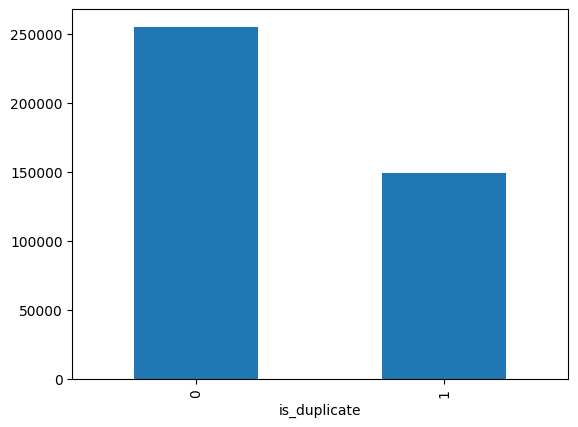

In [6]:
df["is_duplicate"].value_counts().plot(kind="bar")

In [7]:
print(df.iloc[3, :-1][0])
print(df.iloc[3, :-1][1])

Why am I mentally very lonely? How can I solve it?
Find the remainder when [math]23^{24}[/math] is divided by 24,23?


In [8]:
df.isnull().sum()

question1       1
question2       2
is_duplicate    0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

question1       0
question2       0
is_duplicate    0
dtype: int64

<BarContainer object of 2 artists>

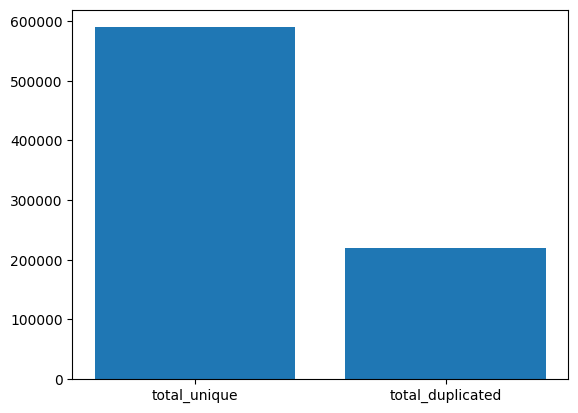

In [15]:
ques1_uniques = len(df["question1"].unique())
ques2_uniques = len(df["question2"].unique())
total_unique = ques1_uniques+ques2_uniques

ques1_repeated = df["question1"].duplicated().sum()
ques2_repeated = df["question2"].duplicated().sum()

total_duplicated = ques1_repeated+ques2_repeated
plt.bar(["total_unique", "total_duplicated"], [total_unique, total_duplicated])


In [28]:
# Number of words in each sentence
def num_words(questions):
    lengths = []
    for ques in questions:
        lengths.append(len(ques.split()))
    
    return lengths

In [29]:
ques_1_lengths = num_words(df["question1"])
ques_2_lengths = num_words(df["question2"])
ques_1_lengths[:2], ques_2_lengths[:2]

([14, 8], [12, 13])

In [30]:
df["question1_len"] = pd.DataFrame(ques_1_lengths)
df["question2_len"] = pd.DataFrame(ques_2_lengths)
df.head()

,question1,question2,is_duplicate,question1_len,question2_len
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,14.0,12.0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,8.0,13.0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,14.0,10.0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,11.0,9.0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,13.0,7.0


# Preprocessing

In [31]:
# Convert to lower case
def convert_lower(questions):
    lower = []
    for ques in questions:
        lower.append(ques.lower())
        
    return lower

In [32]:
ques1_lower = convert_lower(df["question1"])
ques2_lower = convert_lower(df["question2"])

df["question1"] = pd.DataFrame(ques1_lower)
df["question2"] = pd.DataFrame(ques2_lower)
df.head()

,question1,question2,is_duplicate,question1_len,question2_len
0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,14.0,12.0
1,what is the story of kohinoor (koh-i-noor) dia...,what would happen if the indian government sto...,0,8.0,13.0
2,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,14.0,10.0
3,why am i mentally very lonely? how can i solve...,find the remainder when [math]23^{24}[/math] i...,0,11.0,9.0
4,"which one dissolve in water quikly sugar, salt...",which fish would survive in salt water?,0,13.0,7.0
